<a href="https://colab.research.google.com/github/okada-t-rafael/pytorch_study/blob/master/03_pytorch_computer_vision_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises

## Exercise 1

What are 3 areas in industry where computer vision is currently being used?

Answer:
1. Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road.
2. Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines.
3. Security, computer vision can be used to detect whether someone is invading your home or not.

# Exercise 2

Search "what is overfitting in machine learning" and write down a sentence about what you find.

Asnwer:

Overfiting is like memorizing for a test but then you can't answer a question that's slightly different. In other words, if a model is overfitting, it's learning the training data too well and these patterns don't generalize to unseen data.

## Exercise 3

Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Answer:

3 ways to prevent overfitting:
1. Regularization techniques: You could use dropout on your neural networks, dropout involves randomly removing neuros in different layers so that the remaining neuros hopefully leren more robust weights/pattenrs.
2. Use a different model: maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use transfer learning (taking the patterns from one model and applying them to your own problem).
3. Reduce noise in data/cleanup dataset/introduce data augmentation techniques: if the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be remove the noise/clean up the dataset or if this doens't, you can introduce artificial noise through the use of data augmentation to artificailly increase the diversity of your training dataset.

## Exercise 4

Spend 20-minutes reading and clicking through the CNN Explainer website.

* Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

# Exercise 5

Load the `torchvision.datasets.MNIST()` train and test datasets.

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [105]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 128476727.01it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94563383.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45694992.35it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17070366.28it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [106]:
img, label = train_data[0]
print(f"Shape of the images: {img.shape}")

Shape of the images: torch.Size([1, 28, 28])


In [107]:
print(f"Train dataset size: {len(train_data)}")
print(f"Test  dataset size: {len(test_data)}")

Train dataset size: 60000
Test  dataset size: 10000


## Exercise 6

Visualize at least 5 differente samples of the MNIST training dataset.

In [108]:
import matplotlib.pyplot as plt
import torch

In [109]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

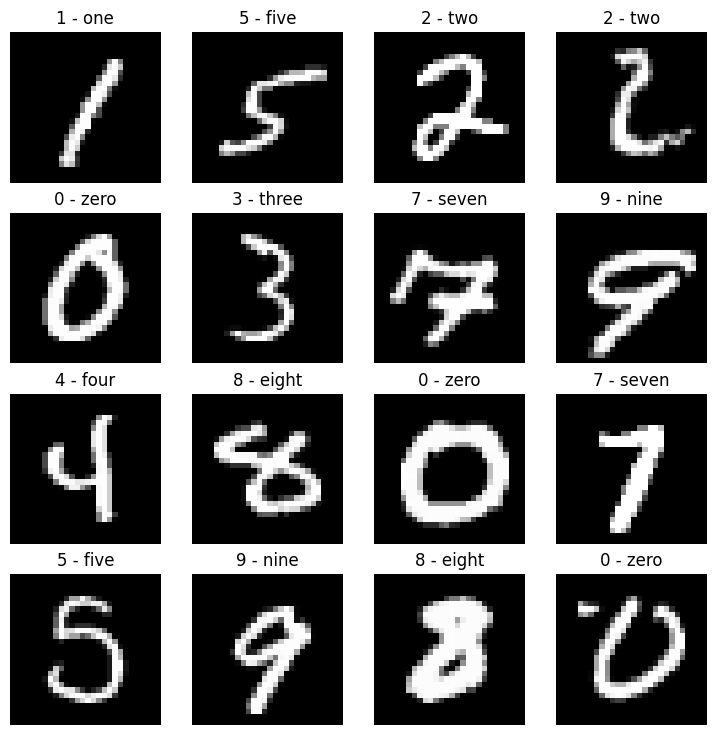

In [110]:
torch.manual_seed(1000)
torch.cuda.manual_seed(1000)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## Exercise 7

Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the batch_size=32.

In [111]:
from torch.utils.data import DataLoader

In [112]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False)

In [113]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [114]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Shape of train_features_batch: {train_features_batch.shape}")
print(f"Shape of train_labels_batch: {train_labels_batch.shape}")

Shape of train_features_batch: torch.Size([32, 1, 28, 28])
Shape of train_labels_batch: torch.Size([32])


## Exercise 8

Recreate `model_2` used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [115]:
import torch
from torch import nn

In [117]:
class TinyVGGReplicaModel(nn.Module):
    def __init__(
            self,
            input_shape: int,
            hidden_units:int,
            output_shape:int
            ) -> None:
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units * (7*7),
                out_features=output_shape),
            )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [118]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [119]:
torch.manual_seed(1000)
torch.cuda.manual_seed(1000)

model = TinyVGGReplicaModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names))

In [120]:
model

TinyVGGReplicaModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## Exercise 9

Train the model you built in exercise 8 on CPU and GPU and see how long it takes each.

In [121]:
from timeit import default_timer
from tqdm.auto import tqdm

In [122]:
def accuracy_fn(
        y_true: torch.Tensor,
        y_pred: torch.Tensor
        ) -> float:
    correct = torch.eq(y_true, y_pred).sum().item()
    return (correct / len(y_pred)) * 100

In [123]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [124]:
torch.manual_seed(1000)
torch.cuda.manual_seed(1000)

train_time_start = default_timer()
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    model.to(device)

    # Training
    train_loss = 0.0
    train_acc = 0.0
    model.train()
    for batch, (X, y) in enumerate(train_dataloader):
        X = X.to(device)
        y = y.to(device)
        # Forward pass
        y_pred = model(X)
        # Calculate loss and acc
        loss = loss_fn(y_pred, y)
        train_loss += loss

        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
        # Optimizer zero grad
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # Gradient descent
        optimizer.step()
        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
    # Calculate the test loss and acc average per batch
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Testing
    test_loss = 0.0
    test_acc = 0.0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Put data into target device
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            # Forward pass
            test_pred = model(X_test)
            # Calculate loss and acc
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
        # Calculate the test loss and acc average per batch
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print out what's happening'
    print(
        f"Train loss: {train_loss:.4f}, Train acc: {train_acc:.3f}% |"
        f"Test loss: {test_loss:.4f}, Test acc: {test_acc:.3f}%\n")

# Calculate training time
train_time_end = default_timer()
total_time = train_time_end - train_time_start
print(f"Train time on {device}: {total_time:.3f} seconds")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.3180, Train acc: 89.208% |Test loss: 0.0786, Test acc: 97.484%

Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.0689, Train acc: 97.923% |Test loss: 0.0575, Test acc: 98.233%

Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train loss: 0.0538, Train acc: 98.322% |Test loss: 0.0461, Test acc: 98.522%

Train time on cuda: 37.181 seconds


In [125]:
# Example to visualize torch argmax behavior.
a = torch.randn(2, 4)
a

tensor([[ 0.3527, -0.3109, -0.4695, -0.2489],
        [-0.1221,  1.7068, -0.6115, -0.0158]])

In [126]:
print(f"Shape: {a.shape}")
print(f"X-axis: {a.shape[0]} rows")
print(f"Y-axis: {a.shape[1]} columns")

Shape: torch.Size([2, 4])
X-axis: 2 rows
Y-axis: 4 columns


In [127]:
# dim=1, the aggregation projects into the dim 1, column.
torch.argmax(a, dim=1)

tensor([0, 1])

In [128]:
# dim=0, the aggregation projects into the dim 0 (i.e. rows)
torch.argmax(a, dim=0)

tensor([0, 1, 0, 1])

## Exercise 10

Make predictions using your trained model and visualize and visualize at least 5 of them comparing the prediction to the target label.

In [129]:
import random

In [130]:
random.seed(1000)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [131]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [132]:
pred_probs = []

model.to(device)
model.eval()
with torch.inference_mode():
    for sample in test_samples:
        # Prepare the samle (add a batch dimension and pass to target device)
        sample = sample.unsqueeze(dim=0).to(device)
        # Forward pass (model output raw logits)
        pred_logit = model(sample)
        # Get predictions probability (logit to prediction probability)
        pred_prob = torch.softmax(pred_logit, dim=1)
        # Get pred_prob off the GPU for further calculations
        pred_probs.append(pred_prob.cpu())

# Concatenates all tensor
pred_probs = torch.cat(pred_probs)

In [133]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 7, 4, 1, 2, 8, 4, 6, 1])

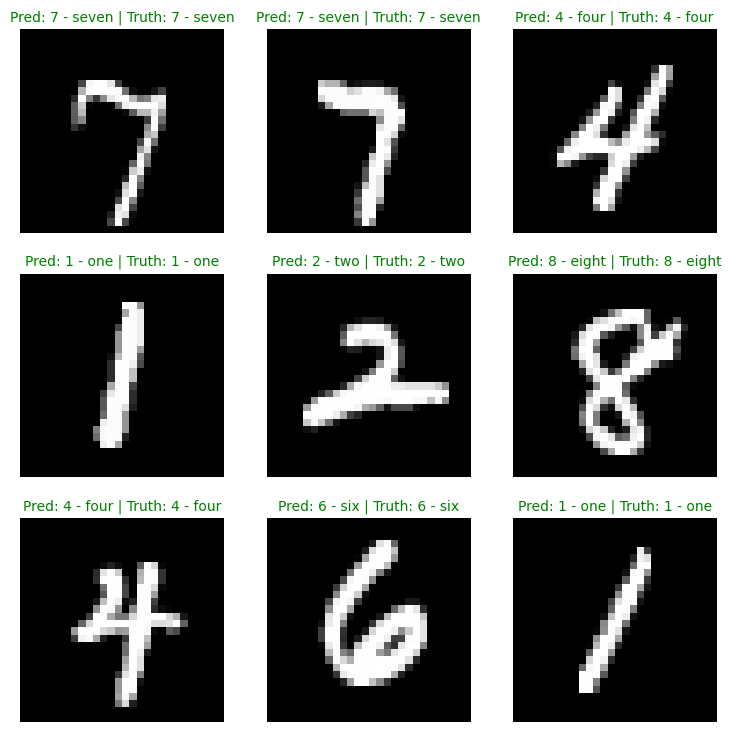

In [134]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

In [135]:
# Example to visualize nn.Softmax behavior.
m = nn.Softmax(dim=1)  # the sum of the values after softmax computation will be 1 in the dim=1 projected direction.
input = torch.randn(2, 5)
input

tensor([[ 2.8162,  0.2791,  0.3036, -0.8849,  0.4659],
        [ 1.2281, -0.1449,  0.4943,  0.4697, -0.3556]])

In [136]:
output = m(input)
output

tensor([[0.7811, 0.0618, 0.0633, 0.0193, 0.0745],
        [0.4155, 0.1053, 0.1994, 0.1946, 0.0853]])

In [137]:
torch.sum(output, dim=1)  # sum is 1

tensor([1.0000, 1.0000])

In [138]:
# Example of torch.cat behavior
t1 = torch.randn(2, 5)
t2 = torch.randn(2, 5)
t1, t2

(tensor([[ 0.4729,  0.1709,  0.1930, -1.4772,  0.2655],
         [-0.8784, -0.0124, -0.0327,  0.9280,  0.0475]]),
 tensor([[-1.4028, -0.2095, -0.4866, -1.6135,  0.2013],
         [ 0.3055,  1.2102, -0.6027, -1.1062,  0.2969]]))

In [139]:
torch.cat([t1, t2])

tensor([[ 0.4729,  0.1709,  0.1930, -1.4772,  0.2655],
        [-0.8784, -0.0124, -0.0327,  0.9280,  0.0475],
        [-1.4028, -0.2095, -0.4866, -1.6135,  0.2013],
        [ 0.3055,  1.2102, -0.6027, -1.1062,  0.2969]])

In [140]:
# Example of torch.stack behavior
t1 = torch.randn(5)
t2 = torch.randn(5)
t1, t2

(tensor([ 0.0045, -0.4013,  0.2880,  0.8376, -0.7081]),
 tensor([1.0426, 0.5307, 0.2060, 0.7323, 0.9455]))

In [141]:
# Stack literally put every tensor into a new tensor (box), stacking it.
torch.stack([t1, t2])

tensor([[ 0.0045, -0.4013,  0.2880,  0.8376, -0.7081],
        [ 1.0426,  0.5307,  0.2060,  0.7323,  0.9455]])

## Exercise 11

Plot a confusion matrix comparing you model's predictions to the truth labels.

In [142]:
!pip install -q torchmetrics

In [143]:
from mlxtend.plotting import plot_confusion_matrix
from torchmetrics import ConfusionMatrix

In [144]:
y_probs = []
model.to(device)
model.eval()
with torch.inference_mode():
    for X_batch, y_batch in tqdm(test_dataloader, desc="Making predictions:"):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        y_batch_logit = model(X_batch)
        y_batch_prob = torch.softmax(y_batch_logit, dim=1)
        y_probs.append(y_batch_prob.cpu())
y_probs = torch.cat(y_probs)

Making predictions::   0%|          | 0/313 [00:00<?, ?it/s]

In [145]:
y_preds = y_probs.argmax(dim=1)
y_preds[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [146]:
conf_mat = ConfusionMatrix(
    num_classes=len(class_names),
    task="multiclass")
conf_mat_tensor = conf_mat(
    preds=y_preds,
    target=test_data.targets)

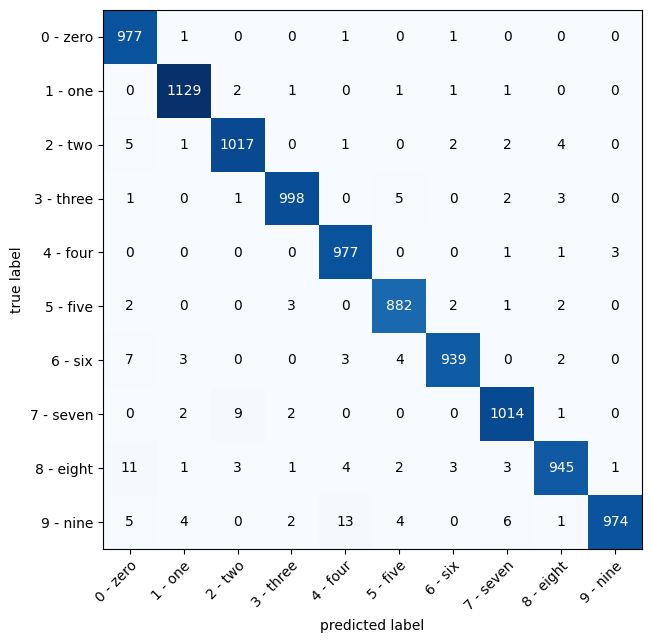

In [147]:
fig, ax = plot_confusion_matrix(
    conf_mat=conf_mat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7))

## Exercise 12

Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [148]:
random_tensor = torch.randn([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [151]:
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=2,
    padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 10, 32, 32])
